In [337]:
#import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [338]:
#load data set
data = pd.read_csv("groceries - groceries.csv")

In [339]:
data.head()

,Transaction,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  9835 non-null   int64 
 1   Item 1       9835 non-null   object
 2   Item 2       7676 non-null   object
 3   Item 3       6033 non-null   object
 4   Item 4       4734 non-null   object
 5   Item 5       3729 non-null   object
 6   Item 6       2874 non-null   object
 7   Item 7       2229 non-null   object
 8   Item 8       1684 non-null   object
 9   Item 9       1246 non-null   object
 10  Item 10      896 non-null    object
 11  Item 11      650 non-null    object
 12  Item 12      468 non-null    object
 13  Item 13      351 non-null    object
 14  Item 14      273 non-null    object
 15  Item 15      196 non-null    object
 16  Item 16      141 non-null    object
 17  Item 17      95 non-null     object
 18  Item 18      66 non-null     object
 19  Item 19      52 non-null   

In [341]:
#Combine the items in a single list
data['Items'] = data.iloc[:, 1:].values.tolist()
data.columns

Index(['Transaction', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5',
       'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32', 'Items'],
      dtype='object')

In [342]:
#Create the dataframe for the analysis
df = data[['Transaction', 'Items']]

In [343]:
df.head

<bound method NDFrame.head of       Transaction                                              Items
0               4  [citrus fruit, semi-finished bread, margarine,...
1               3  [tropical fruit, yogurt, coffee, nan, nan, nan...
2               1  [whole milk, nan, nan, nan, nan, nan, nan, nan...
3               4  [pip fruit, yogurt, cream cheese, meat spreads...
4               4  [other vegetables, whole milk, condensed milk,...
...           ...                                                ...
9830           17  [sausage, chicken, beef, hamburger meat, citru...
9831            1  [cooking chocolate, nan, nan, nan, nan, nan, n...
9832           10  [chicken, citrus fruit, other vegetables, butt...
9833            4  [semi-finished bread, bottled water, soda, bot...
9834            5  [chicken, tropical fruit, other vegetables, vi...

[9835 rows x 2 columns]>

In [344]:
#Remove e NaN value
df.loc[:, 'Items'] = df['Items'].apply(lambda x: [item for item in x if isinstance(item, str)])

In [345]:
df.head

<bound method NDFrame.head of       Transaction                                              Items
0               4  [citrus fruit, semi-finished bread, margarine,...
1               3                   [tropical fruit, yogurt, coffee]
2               1                                       [whole milk]
3               4    [pip fruit, yogurt, cream cheese, meat spreads]
4               4  [other vegetables, whole milk, condensed milk,...
...           ...                                                ...
9830           17  [sausage, chicken, beef, hamburger meat, citru...
9831            1                                [cooking chocolate]
9832           10  [chicken, citrus fruit, other vegetables, butt...
9833            4  [semi-finished bread, bottled water, soda, bot...
9834            5  [chicken, tropical fruit, other vegetables, vi...

[9835 rows x 2 columns]>

In [346]:
#Obtain frequancy of each item
item_frequency = pd.Series([item for sublist in df['Items'] for item in sublist]).value_counts()
print(item_frequency)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Name: count, Length: 169, dtype: int64


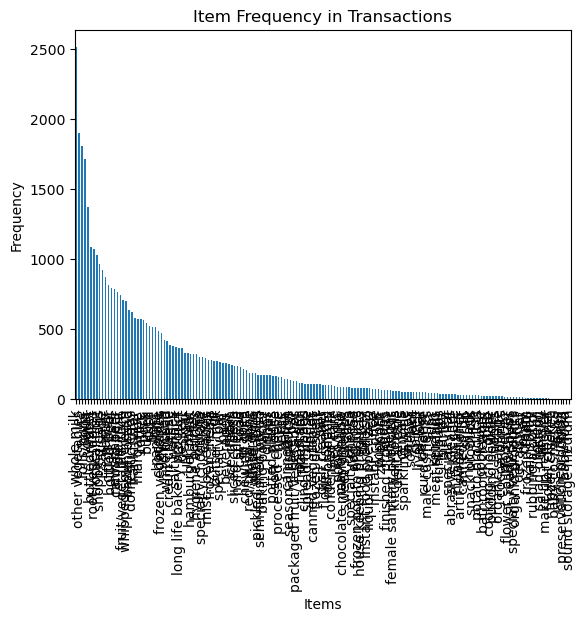

In [347]:
#Visualize item frequency
item_frequency.plot(kind='bar')
plt.title("Item Frequency in Transactions")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()


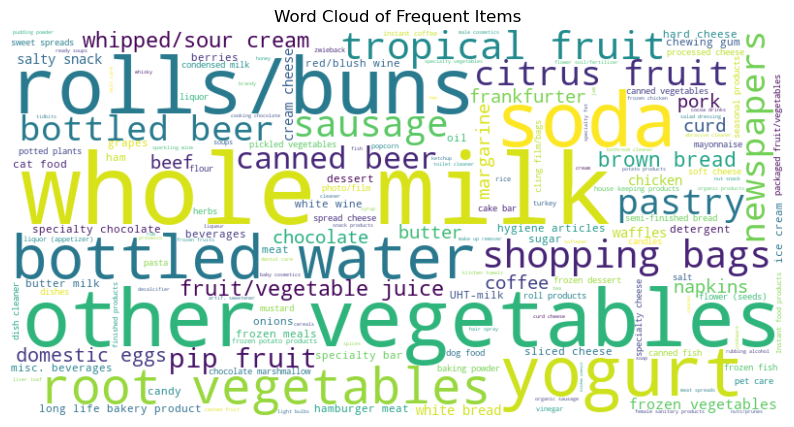

In [370]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(item_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Items")
plt.show()


In [348]:
#Obtain transaction size
df['num_items'] = df['Items'].apply(len)
print(df[['Transaction', 'num_items']])

      Transaction  num_items
0               4          4
1               3          3
2               1          1
3               4          4
4               4          4
...           ...        ...
9830           17         17
9831            1          1
9832           10         10
9833            4          4
9834            5          5

[9835 rows x 2 columns]


C:\Users\ghosh\AppData\Local\Temp\ipykernel_4564\675088855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_items'] = df['Items'].apply(len)


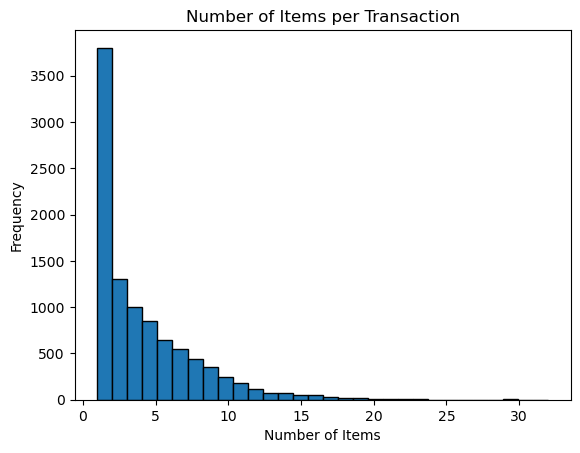

In [349]:
#Visualize Transaction size
df['num_items'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Number of Items per Transaction")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.show()


In [350]:
#Item Co-occurrence
from itertools import combinations
from collections import Counter


item_pairs = []
for items in df['Items']:
    item_pairs.extend(combinations(sorted(items), 2))


item_pair_counts = Counter(item_pairs)

item_pair_df = pd.DataFrame(item_pair_counts.items(), columns=['Item Pair', 'Count'])


print(item_pair_df)



                                Item Pair  Count
0               (citrus fruit, margarine)     78
1             (citrus fruit, ready soups)      3
2     (citrus fruit, semi-finished bread)     24
3                (margarine, ready soups)      5
4        (margarine, semi-finished bread)     20
...                                   ...    ...
9631                  (softener, waffles)      1
9632               (dessert, nuts/prunes)      1
9633           (red/blush wine, zwieback)      1
9634                    (dishes, ketchup)      1
9635                  (ketchup, zwieback)      1

[9636 rows x 2 columns]


In [351]:
item_pair_df['Count'].unique()

array([ 78,   3,  24,   5,  20,   4,  70,  96, 288,  11,  60, 122,  18,
       177,   8,  25, 105, 133, 736,  16,  10, 271, 144,  46,  23, 551,
        80,  63, 159, 134,  14,   9, 419,  36,  57, 244, 182,  43, 125,
        42, 353, 135,  86,  88,  21,  27, 338, 226,  90,  67,  15,  22,
        98,  32, 196, 300, 213,  31, 101, 257, 170,  19,  52,  37,  83,
        48, 416, 189, 111, 377,  79,  81,  47,  33,  71, 116,   2,   1,
         6,   7,  68,  26,  53,  29,  62,  17, 466, 106,  99, 239,  49,
       242, 207,  65,  55,  38,  13, 301,  82,  75,  91, 124,  39, 112,
       136, 181,  30,  12,  54,  44,  56,  85, 238,  94,  58, 142, 115,
        51, 481, 148,  72,  89, 322, 284, 117, 218, 114, 394, 317, 192,
       154,  34,  95, 100, 248, 143, 184, 141, 295, 108, 130,  69, 327,
       174, 183, 254, 205, 269,  74, 104, 285,  45,  84, 194, 151,  41,
        35, 197, 132, 127, 169, 107, 103,  93, 168, 113,  64, 219,  61,
        92,  40,  50,  66,  28, 206, 175, 201, 110, 123, 209, 29

In [352]:
item_pair_df['Item Pair'] = item_pair_df['Item Pair'].astype(str)

In [353]:
item_pair_df['Item Pair Number'] = range(1, len(item_pair_df) + 1)

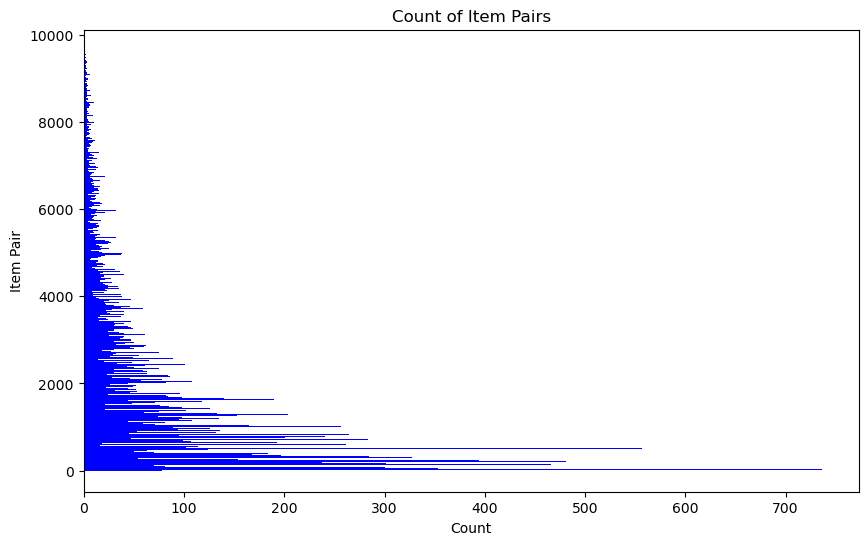

In [354]:
plt.figure(figsize=(10, 6))
plt.barh(item_pair_df['Item Pair Number'], item_pair_df['Count'], color='blue', height = 10.0)
plt.xlabel('Count')
plt.ylabel('Item Pair')
plt.title('Count of Item Pairs')
plt.show()

In [356]:
#One-Hot Encoding
from mlxtend.preprocessing import TransactionEncoder

transactions = df['Items'].tolist()

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_data, columns=te.columns_).astype(int)
print(basket_df)


      Instant food products  UHT-milk  ...  yogurt  zwieback
0                         0         0  ...       0         0
1                         0         0  ...       1         0
2                         0         0  ...       0         0
3                         0         0  ...       1         0
4                         0         0  ...       0         0
...                     ...       ...  ...     ...       ...
9830                      0         0  ...       0         0
9831                      0         0  ...       0         0
9832                      0         0  ...       1         0
9833                      0         0  ...       0         0
9834                      0         0  ...       0         0

[9835 rows x 169 columns]


In [357]:
basket_df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'baby food', 'bags',
       'baking powder', 'bathroom cleaner', 'beef',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=169)

In [358]:
#Train the model

In [359]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket_df, min_support = 0.05, use_colnames=True)

In [360]:
# Generate the association rules with 'lift' as the metric and a minimum threshold
rules = association_rules(frequent_itemsets, num_itemsets= int, metric="lift", min_threshold=1)

rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


In [361]:
#Make Decision

In [362]:
basket_df['other vegetables'].sum()

1903

In [363]:
basket_df['whole milk'].sum()

2513

In [364]:
rule_filtered = rules[(rules['lift'] >= 1.5) & (rules['confidence'] >= 0.3)]
rule_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


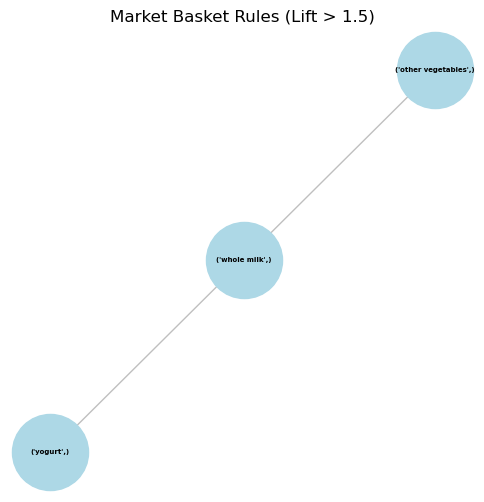

In [369]:
import networkx as nx

# Visualize the decision rule
rules_filtered = rules[rules['lift'] > 1.5]  # Example: filter based on lift


G = nx.Graph()

for _, rule in rules_filtered.iterrows():
    antecedent = tuple(rule['antecedents'])
    consequent = tuple(rule['consequents'])
    
    G.add_edge(antecedent, consequent, weight=rule['lift'])

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Positioning of nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=5, font_weight='bold')
plt.title("Market Basket Rules (Lift > 1.5)")
plt.axis("off")
plt.show()
